<a href="https://colab.research.google.com/github/kky107102/ML_TEAM8/blob/main/project_ky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gangyeonee","key":"439884bd9c44b7629b04d9101d06cf61"}'}

In [22]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [23]:
!kaggle datasets download -d osmankagankurnaz/dataset-of-ai-generated-fruits-and-real-fruits

Dataset URL: https://www.kaggle.com/datasets/osmankagankurnaz/dataset-of-ai-generated-fruits-and-real-fruits
License(s): Apache 2.0
 97% 73.0M/75.6M [00:01<00:00, 65.9MB/s]
100% 75.6M/75.6M [00:01<00:00, 43.1MB/s]


In [24]:
!unzip -o /content/dataset-of-ai-generated-fruits-and-real-fruits.zip -d fruits/

Archive:  /content/dataset-of-ai-generated-fruits-and-real-fruits.zip
  inflating: fruits/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-1.jpg  
  inflating: fruits/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-10.jpg  
  inflating: fruits/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-11.jpg  
  inflating: fruits/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-12.jpg  
  inflating: fruits/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-13.jpg  
  inflating: fruits/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-14.jpg  
  inflating: fruits/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots/green-apple-ohs-15.jpg  
  inflating: fruits/Dataset of AI Generated Fruits and Real Fruits/Ai/

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/fruits'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Fine-tuning CNN - 97.08% made by ACHAL GUPTA 를 참고함   
https://www.kaggle.com/code/guptaachal02/fine-tuning-cnn-97-08   
Apache Licence 적용을 받음   

**데이터 처리**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import regularizers
from IPython.display import Image

데이터 가져오기

In [28]:
dataset_dir1 = "/content/fruits/Dataset of AI Generated Fruits and Real Fruits/"
# dataset_dir2 = "/content/kaggle/input/cifake-real-and-ai-generated-synthetic-images/" # For Kaggle notebooks. If you run locally, point this line to the CIFAKE directory
print("Loading dataset from: " + dataset_dir1)

Loading dataset from: /content/fruits/Dataset of AI Generated Fruits and Real Fruits/


In [29]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [73]:
img_height = 64
img_width = 64
batch_size = 50
dir1_dataset = tf.keras.utils.image_dataset_from_directory(
  dataset_dir1,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = batch_size)

#dir1_2 = tf.keras.utils.image_dataset_from_directory(
 # dataset_dir1 + "/real",
 # seed = 512,
 # image_size = (img_height, img_width),
 # batch_size = batch_size)


def set_labels_to_value(image, label):
    new_label = tf.fill(tf.shape(label), 1)  # 예시: 모든 라벨 값을 1로 설정
    return image, new_label
# 데이터셋에 변환 함수 적용
#dir1_2 = dir1_2.map(set_labels_to_value)


#dir2_1 = tf.keras.utils.image_dataset_from_directory(
#  dataset_dir2 + "/train",
#  seed = 512,
#  image_size = (img_height, img_width),
#  batch_size = batch_size)

#dir2_2 = tf.keras.utils.image_dataset_from_directory(
#  dataset_dir2 + "/test",
#  seed = 512,
#  image_size = (img_height, img_width),
#  batch_size = batch_size)


for i, l in dir1_dataset.take(5):
  print("label:",l)
#dir1_dataset = dir1_1.concatenate(dir1_2)
print(len(dir1_dataset))
#dir2_dataset = dir2_1.concatenate(dir2_2)
#final_dataset = dir1_dataset.concatenate(dir2_dataset)


#final_dataset = dir2_1.concatenate(dir2_2)
final_dataset = dir1_dataset



Found 306 files belonging to 2 classes.
label: tf.Tensor(
[1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 0 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0], shape=(50,), dtype=int32)
label: tf.Tensor(
[1 0 1 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 1], shape=(50,), dtype=int32)
label: tf.Tensor(
[0 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0
 1 1 1 0 1 1 0 0 0 0 1 1 0], shape=(50,), dtype=int32)
label: tf.Tensor(
[0 1 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 1 1 1 0 1 1 1 0 1 0 0 1], shape=(50,), dtype=int32)
7


In [74]:
final_shuffled_dataset = final_dataset.shuffle(buffer_size=len(final_dataset), seed=400) #데이터셋 섞기

In [75]:
len(final_shuffled_dataset)

7

In [76]:
dataset_size = len(final_dataset)
train_validation_size = int(dataset_size * 0.8) #train과 test사이즈를 80%
test_size = dataset_size - train_validation_size
train_validation_dataset = final_shuffled_dataset.take(train_validation_size)
test_dataset = final_shuffled_dataset.skip(train_validation_size)


train_size = int(train_validation_size * 0.8) #train 데이터셋 사이즈를 90%
validation_size = train_validation_size - train_size
train_dataset = train_validation_dataset.take(train_size)
validation_dataset = train_validation_dataset.skip(train_size)


print("train_dataset size:",len(train_dataset))
print("validation_dataset size:",len(validation_dataset))
print("test_dataset size",len(test_dataset))


train_dataset size: 4
validation_dataset size: 1
test_dataset size 2


**ResNet 모델로 Transfer Learning**

In [77]:
# Building the Transfer Learning model using ResNet50
ResNet_base_model = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
ResNet_base_model.trainable = True

# Create a new model on top of the ResNet50 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = ResNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(128,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .2, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
ResNet_model = tf.keras.Model(inputs, outputs)

# Compile the model
ResNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Summary of the model
ResNet_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization_7 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                           

In [78]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

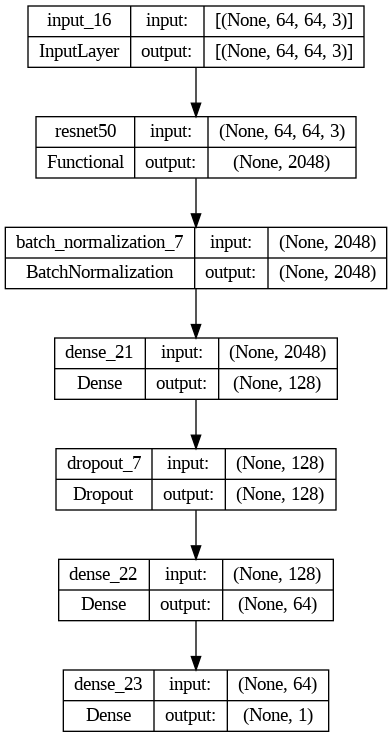

In [79]:
# Visualize the ResNet model architecture
tf.keras.utils.plot_model(ResNet_model, show_shapes = True, to_file = 'ResNet_model.png')
Image('ResNet_model.png')

In [80]:
# Train the Transfer Learning model
print("Starting training with Transfer Learning using ResNet50...")
ResNet_model_history = ResNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 40,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using ResNet50...
Epoch 1/40
4/4 [==============================] - 29s 862ms/step - loss: 3.4627 - accuracy: 0.7756 - precision_7: 0.8769 - recall_7: 0.6786 - val_loss: 649.2919 - val_accuracy: 0.5000 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 2/40
4/4 [==============================] - 1s 278ms/step - loss: 3.1231 - accuracy: 0.9744 - precision_7: 0.9765 - recall_7: 0.9765 - val_loss: 106.4616 - val_accuracy: 0.4800 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 3/40
4/4 [==============================] - 1s 240ms/step - loss: 2.8659 - accuracy: 0.9936 - precision_7: 0.9873 - recall_7: 1.0000 - val_loss: 201.3871 - val_accuracy: 0.4000 - val_precision_7: 0.0000e+00 - val_recall_7: 0.0000e+00
Epoch 4/40
4/4 [==============================] - 1s 241ms/step - loss: 2.6899 - accuracy: 1.0000 - precision_7: 1.0000 - recall_7: 1.0000 - val_loss: 258.4239 - val_accuracy: 0.6667 - val_precision_7: 0.0000e+00 - val_r

In [81]:
# Evaluate the model on the vaildation dataset
val_loss, val_accuracy, val_precision, val_recall = ResNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

1/1 [==============================] - 1s 642ms/step - loss: 11.1917 - accuracy: 0.5800 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
Val Loss: 11.1917
Val Accuracy: 0.5800
Val Precision: 0.0000
Val Recall: 0.0000


In [82]:
# 데스트 데이터 셋
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

2/2 [==============================] - 1s 16ms/step - loss: 12.3641 - accuracy: 0.4800 - precision_7: 0.0000e+00 - recall_7: 0.0000e+00
test Loss: 12.3641
test Accuracy: 0.4800
test Precision: 0.0000
test Recall: 0.0000


In [84]:
#모델 저장
ResNet_model.save('ResNet_c_model_fruits_32_50.h5')
model_json = ResNet_model.to_json()
with open('ResNet_model.json','w') as f:
  f.write(model_json)

In [ ]:
#모델 불러오기
ResNet_model = tf.keras.models.load_model('ResNet_c_model.h5')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import matplotlib.pyplot as plt

# ResNet50 모델 불러오기 (ImageNet 가중치 사용)

# 이미지 파일 경로
img_path = '/content/drive/MyDrive/images/Real/11.png'  # 여기에 실제 이미지 파일 경로를 입력하세요.



# 이미지 로드 및 전처리
img = image.load_img(img_path, target_size=(32, 32))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# 예측 수행
preds = ResNet_model.predict(x)

# 결과 디코딩 및 출력
print('Predicted:', preds)

# 이미지 출력
plt.imshow(img)
plt.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/images/Real/11.png'

In [ ]:
test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(dir2_1)

print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")


167/167 [==============================] - 5s 22ms/step - loss: 0.0149 - accuracy: 0.9984 - precision_3: 0.9984 - recall_3: 0.9983
test Loss: 0.0149
test Accuracy: 0.9984
test Precision: 0.9984
test Recall: 0.9983


In [ ]:
result_show(ResNet_model,dir2_1)

NameError: name 'result_show' is not defined

In [ ]:
#테스ㅌ
dir = '/content/drive/MyDrive/이미지 데이터셋 폴더'

rt= tf.keras.utils.image_dataset_from_directory(
  dir,
  seed = 512,
  image_size = (img_height, img_width),
  batch_size = 10)


def result_show(model,test_dataset):
  result = model.predict(test_dataset)
  cnt = 0
  for images ,labels in test_dataset.take(50):
    plt.figure(figsize=(10,10))
    for i in range(9):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(images[i].numpy().astype('uint8'))
      if int(labels[i]) == 0:
        isReal = 'Fake'
      else:
        isReal = 'Real'

      if result[cnt][0] >= 0.5:
        a = "Real"
      else :
        a = 'Fake'

      plt.title(f"{isReal} -> {a}")
      cnt +=1
      plt.axis("off")
    plt.show()
  test_loss, test_accuracy, test_precision, test_recall = ResNet_model.evaluate(test_dataset)

  print(f"test Loss: {test_loss:.4f}")
  print(f"test Accuracy: {test_accuracy:.4f}")
  print(f"test Precision: {test_precision:.4f}")
  print(f"test Recall: {test_recall:.4f}")

result_show(ResNet_model,rt)

NotFoundError: Could not find directory /content/drive/MyDrive/이미지 데이터셋 폴더

**VGG16 모델**

In [ ]:
# Building the Transfer Learning model using VGG16
VGG_base_model = tf.keras.applications.VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
VGG_base_model.trainable = True



58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
# Create a new model on top of the VGG16 base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = VGG_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
VGG_model = tf.keras.Model(inputs, outputs)


In [ ]:
# Compile the Transfer Learning model
VGG_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
VGG_model.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_40 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 batch_normalization_19 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dense_61 (Dense)            (None, 256)               131328    
                                                                 
 dropout_19 (Dropout)        (None, 256)               0         
                                                                 
 dense_62 (Dense)            (None, 64)                16448     
                                                          

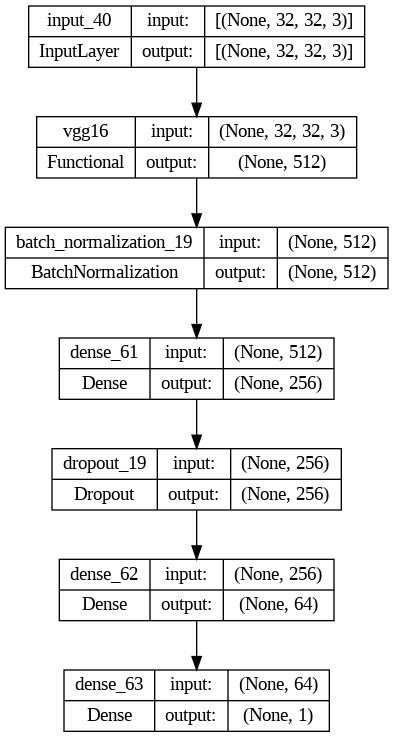

In [ ]:
# Visualize the VGG model architecture
tf.keras.utils.plot_model(VGG_model, show_shapes = True, to_file = 'VGG_model.png')
Image('VGG_model.png')

In [ ]:
print("Starting training with Transfer Learning using VGG16...")
VGG_model_history = VGG_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

Starting training with Transfer Learning using VGG16...
Epoch 1/5
129/129 [==============================] - 49s 231ms/step - loss: 1.8364 - accuracy: 0.8024 - precision_19: 0.7792 - recall_19: 0.8421 - val_loss: 0.8329 - val_accuracy: 0.8901 - val_precision_19: 0.8538 - val_recall_19: 0.9423
Epoch 2/5
129/129 [==============================] - 37s 233ms/step - loss: 0.5474 - accuracy: 0.9139 - precision_19: 0.9078 - recall_19: 0.9219 - val_loss: 0.7354 - val_accuracy: 0.7099 - val_precision_19: 0.6293 - val_recall_19: 0.9978
Epoch 3/5
129/129 [==============================] - 27s 158ms/step - loss: 0.3472 - accuracy: 0.9315 - precision_19: 0.9264 - recall_19: 0.9363 - val_loss: 0.3285 - val_accuracy: 0.9255 - val_precision_19: 0.8837 - val_recall_19: 0.9762
Epoch 4/5
129/129 [==============================] - 28s 159ms/step - loss: 0.2751 - accuracy: 0.9414 - precision_19: 0.9436 - recall_19: 0.9397 - val_loss: 0.2649 - val_accuracy: 0.9363 - val_precision_19: 0.9417 - val_recall_19:

validation_dataset으로 검증

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = VGG_model.evaluate(validation_dataset)

# Print the metrics
print(f"val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

33/33 [==============================] - 8s 37ms/step - loss: 0.2955 - accuracy: 0.9140 - precision_19: 0.8595 - recall_19: 0.9892
val Loss: 0.2955
Val Accuracy: 0.9140
Val Precision: 0.8595
Val Recall: 0.9892


테스트셋으로 검증

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = VGG_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")

41/41 [==============================] - 9s 37ms/step - loss: 0.2915 - accuracy: 0.9166 - precision_19: 0.8622 - recall_19: 0.9895
test Loss: 0.2915
test Accuracy: 0.9166
test Precision: 0.8622
test Recall: 0.9895


33/33 [==============================] - 8s 36ms/step


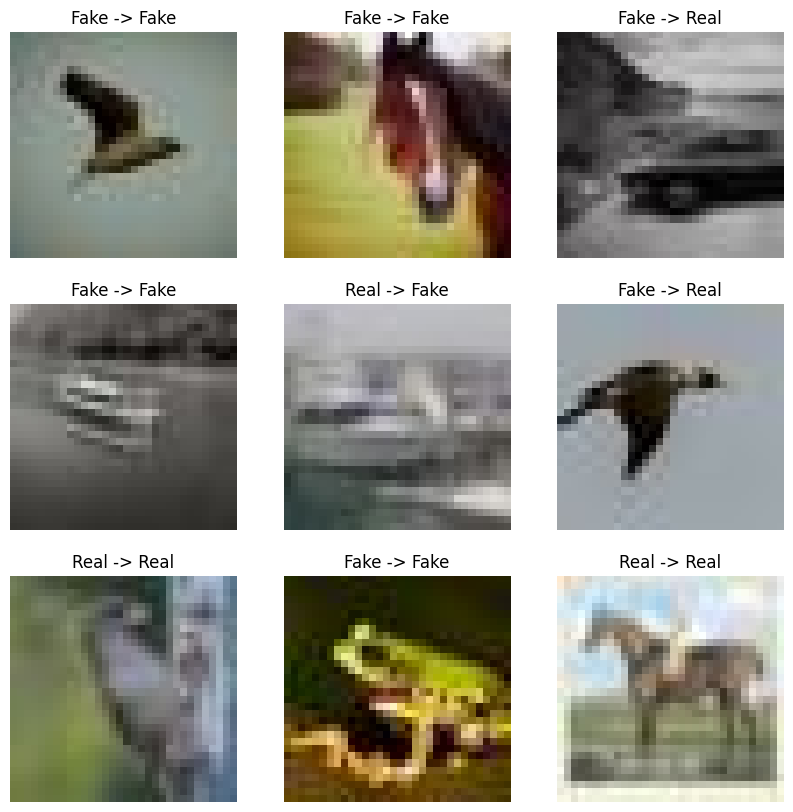

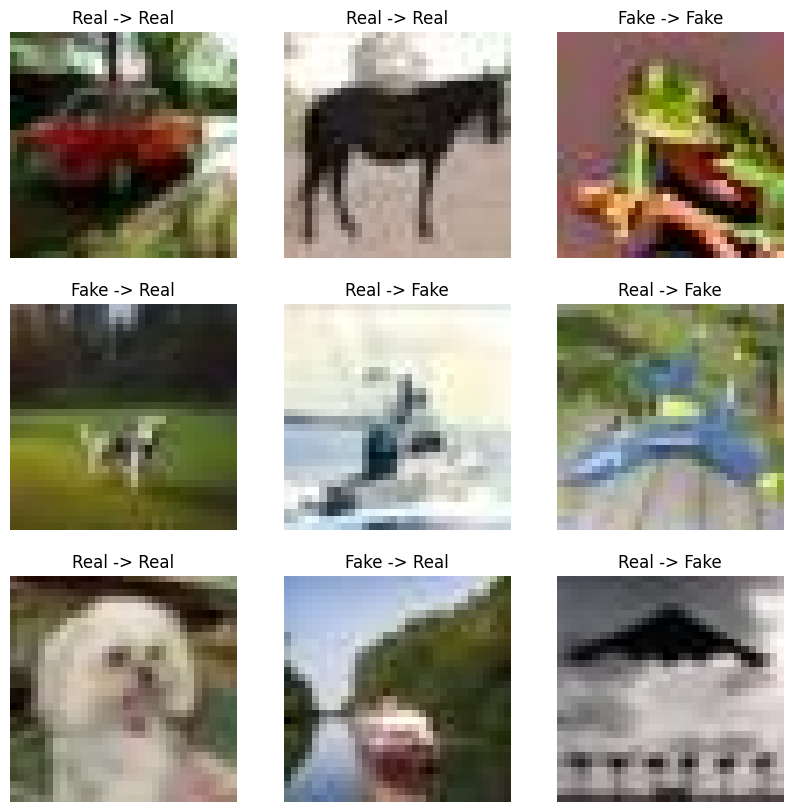

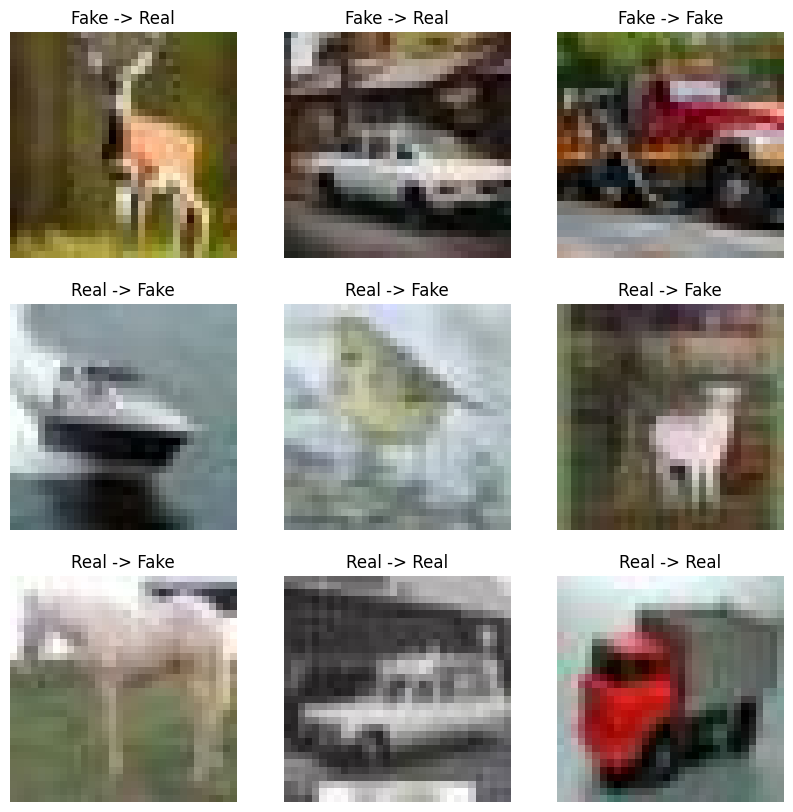

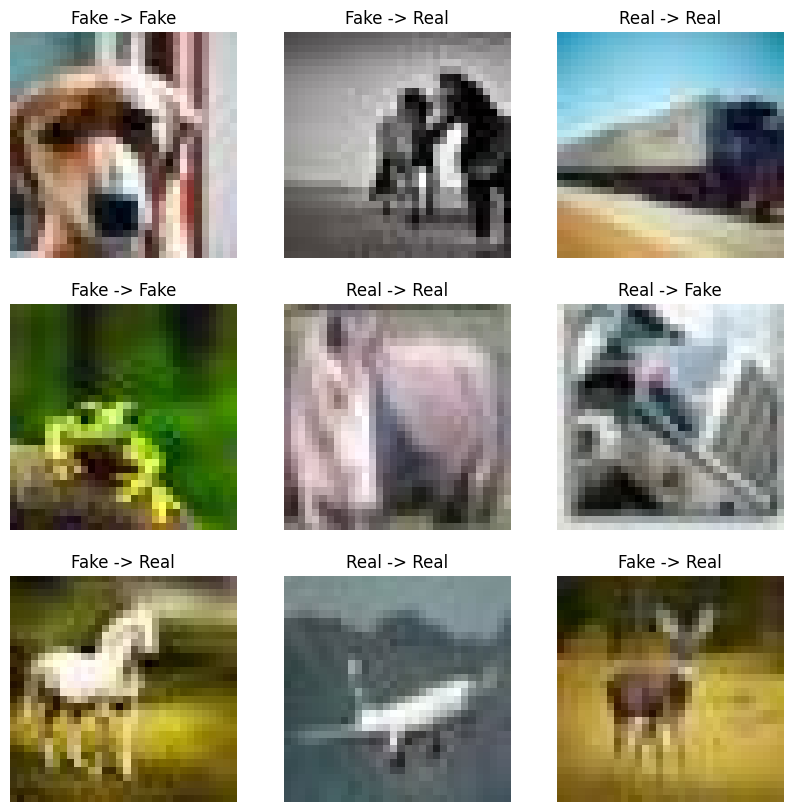

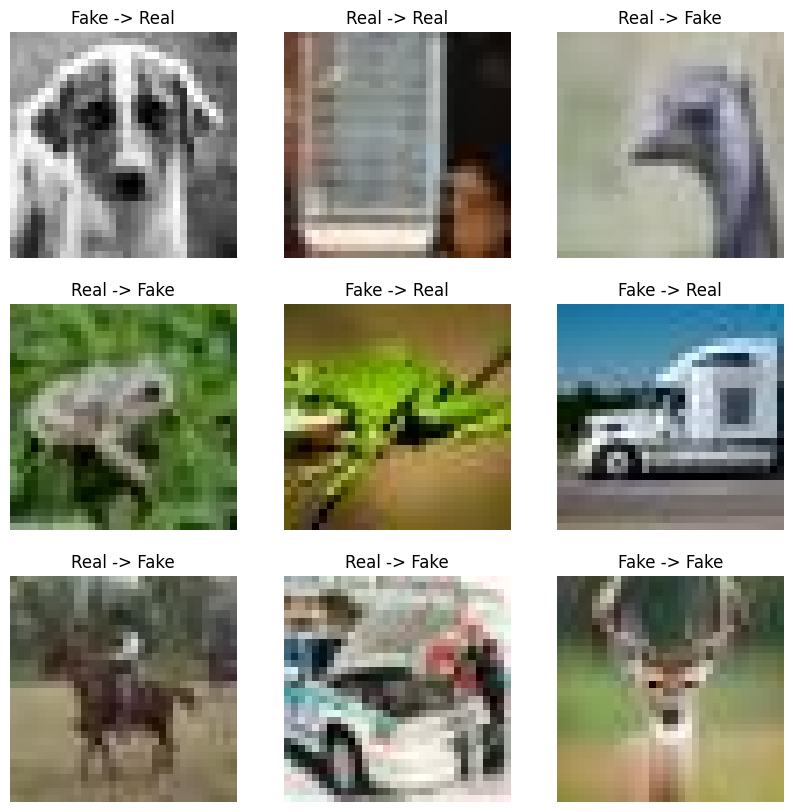

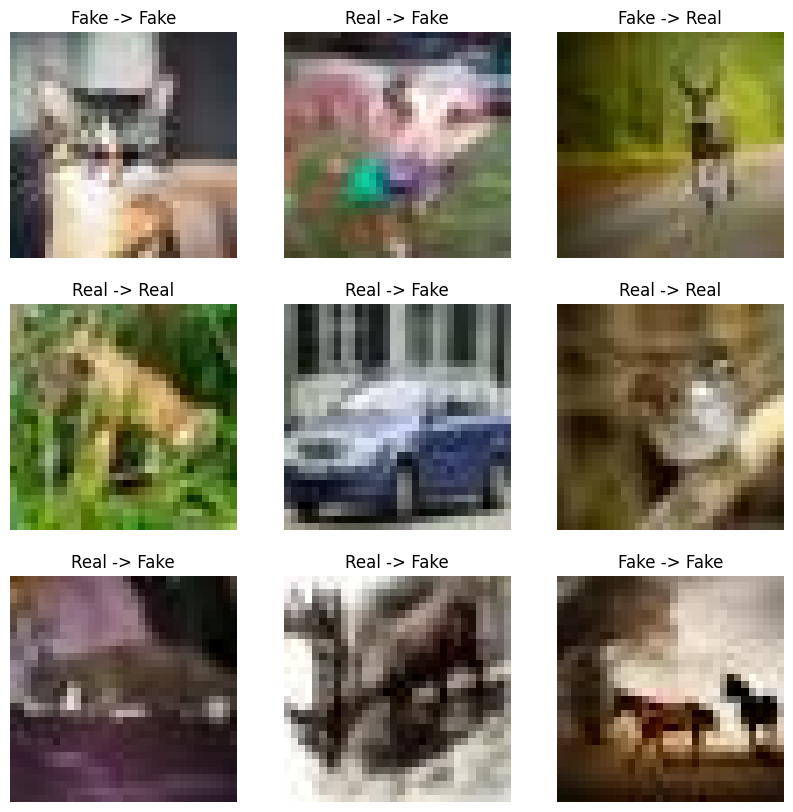

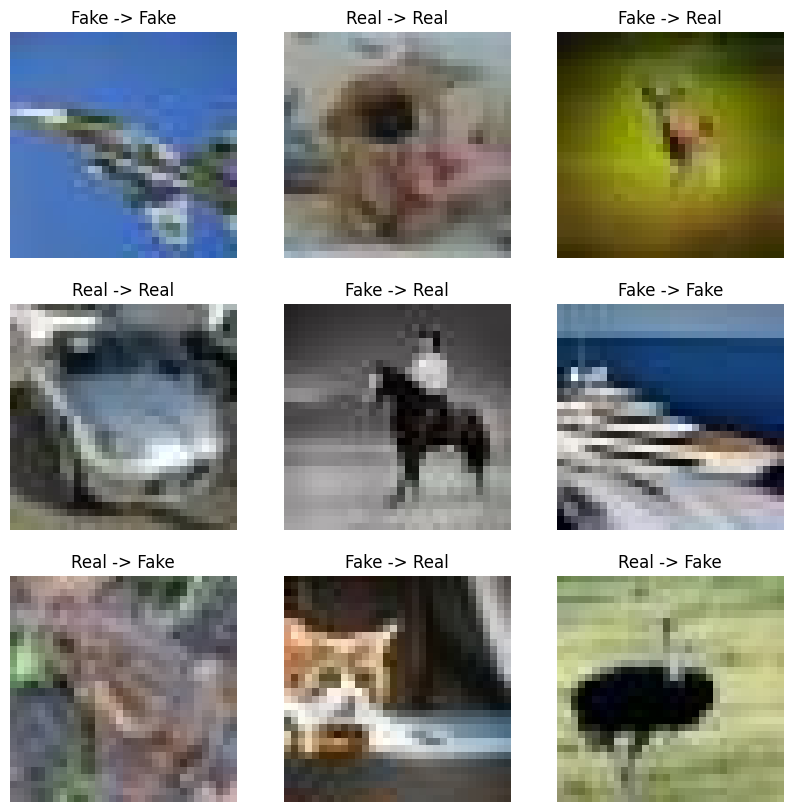

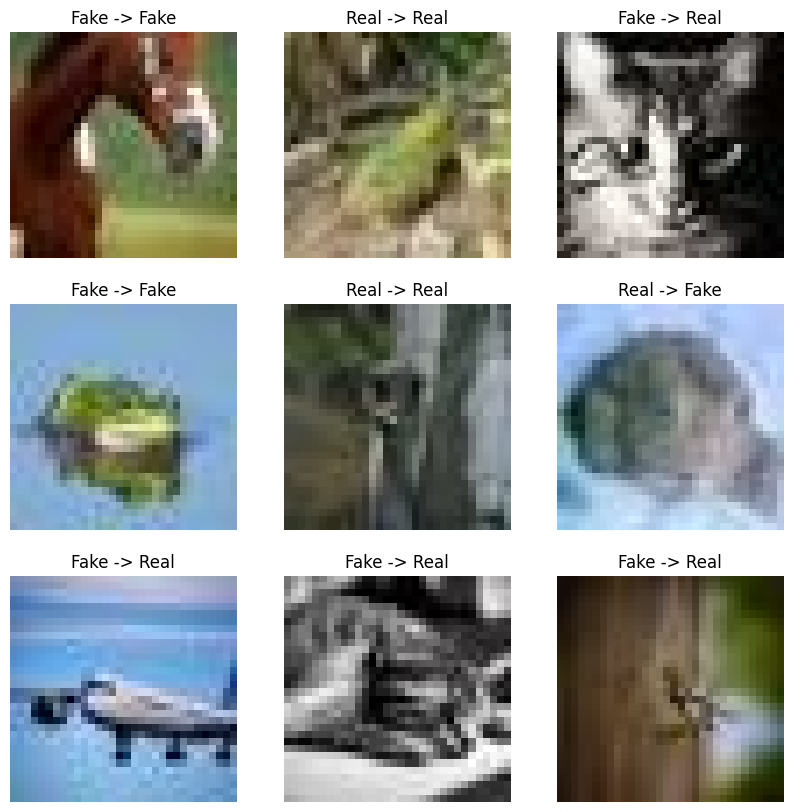

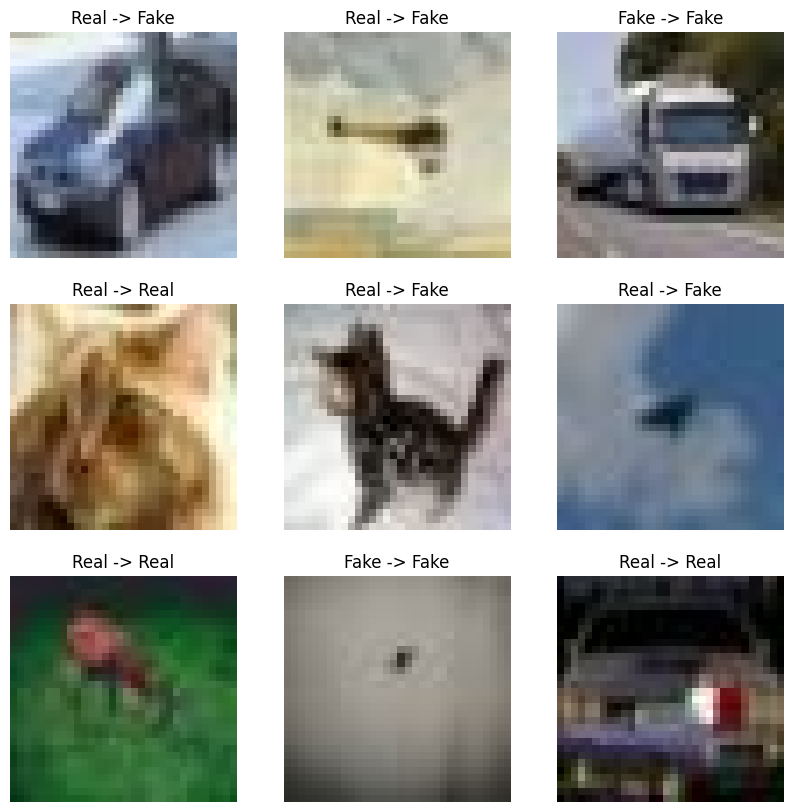

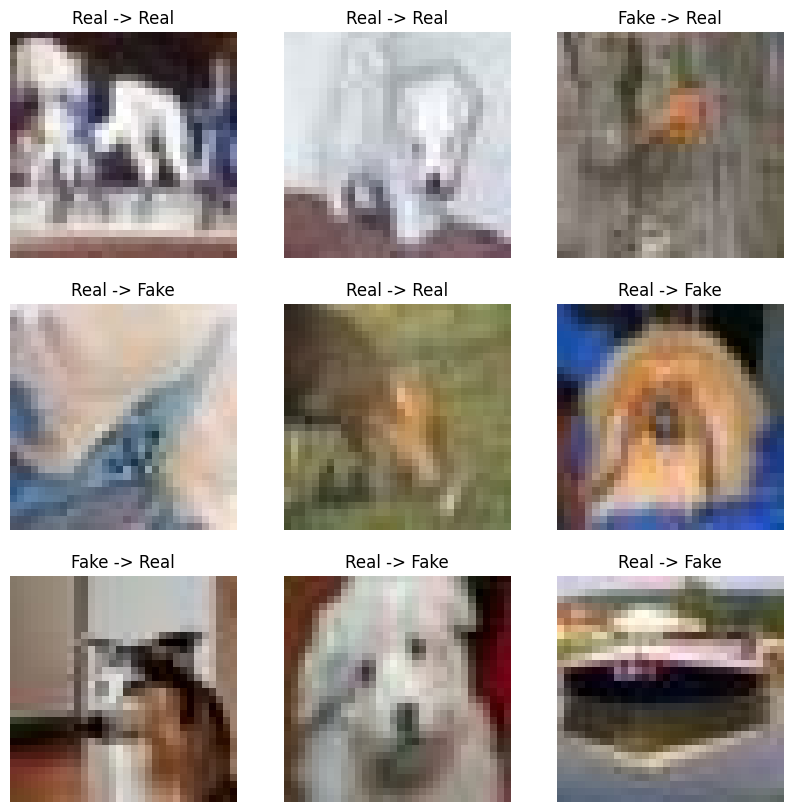

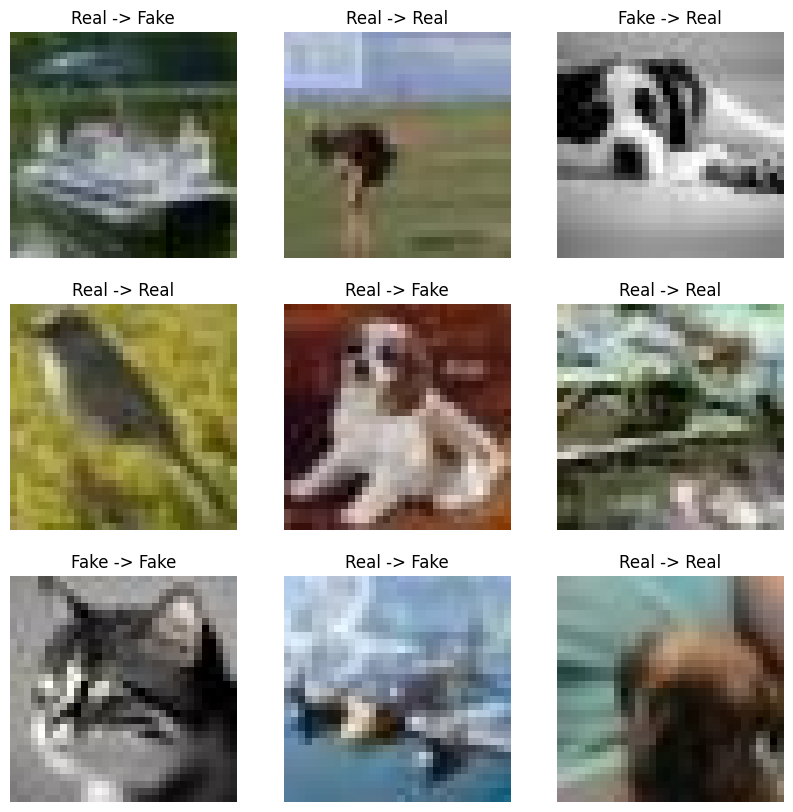

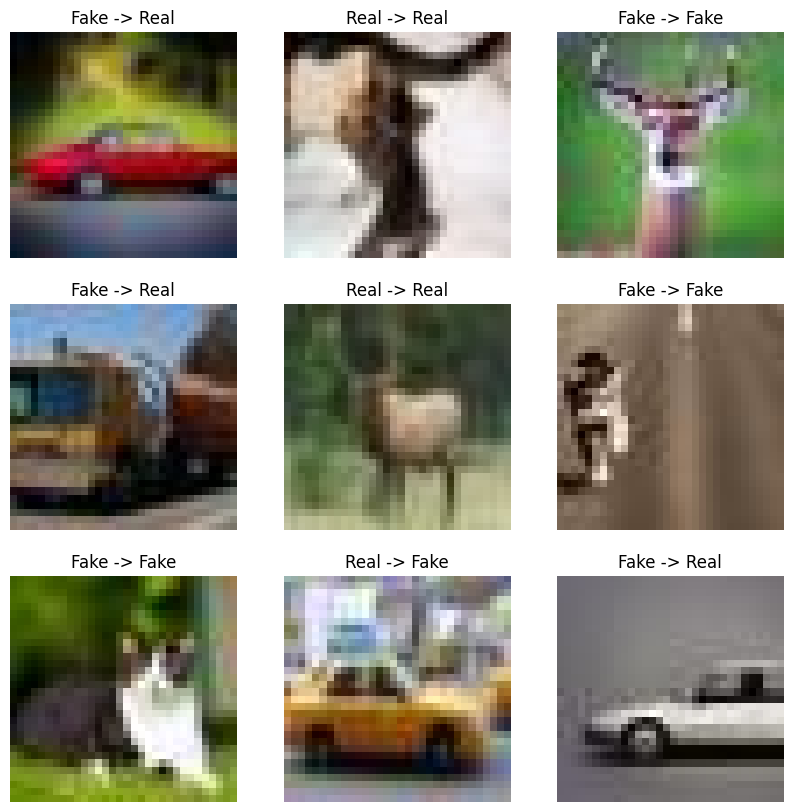

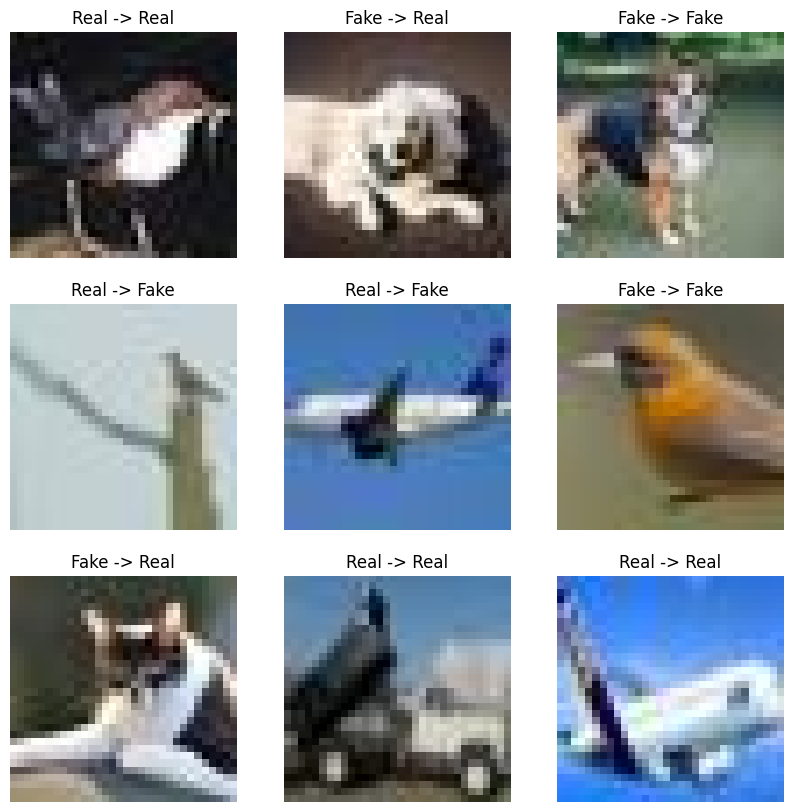

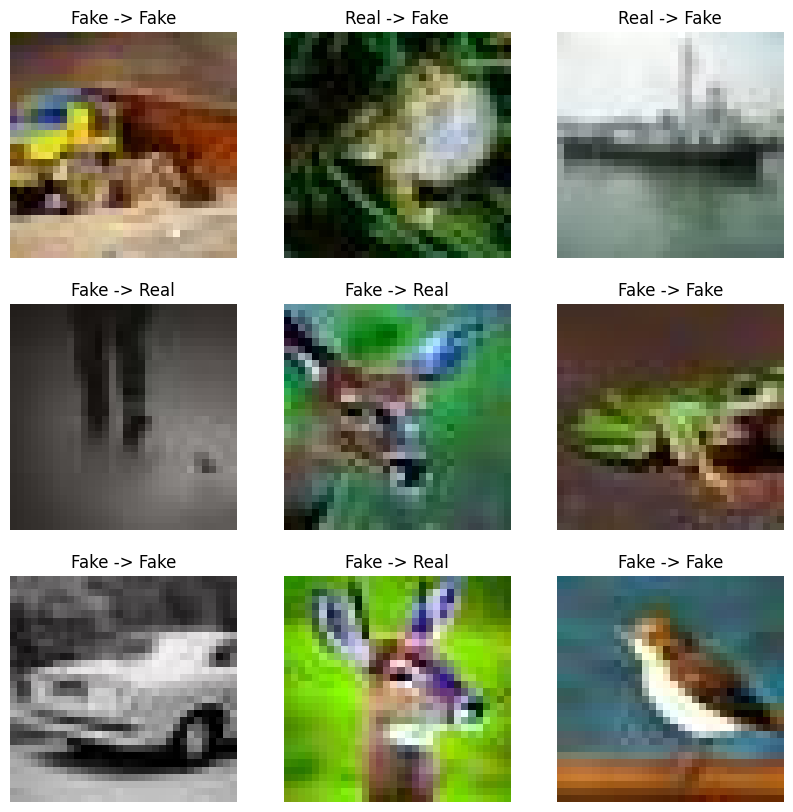

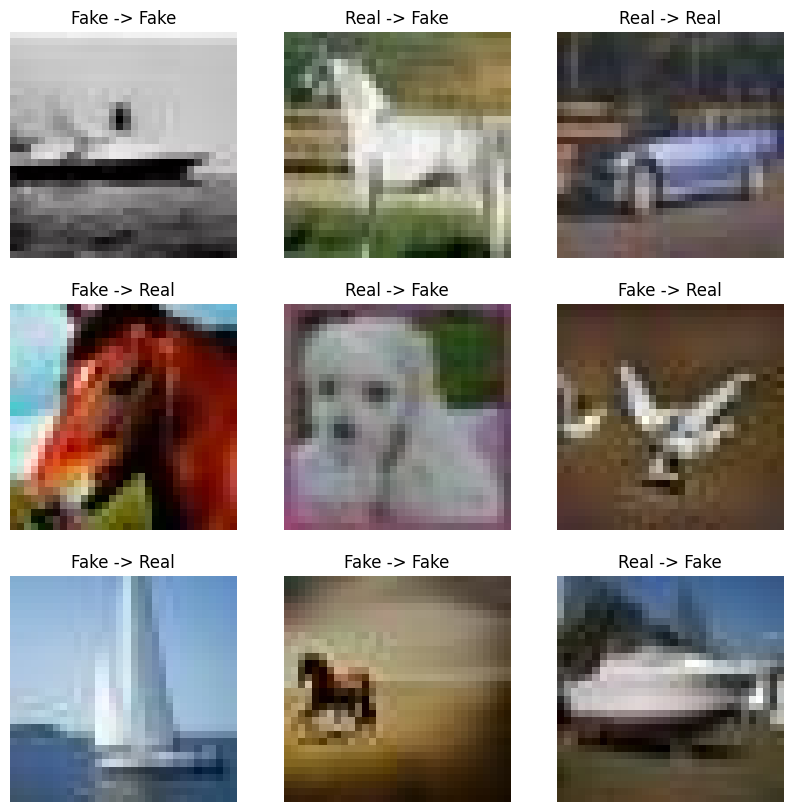

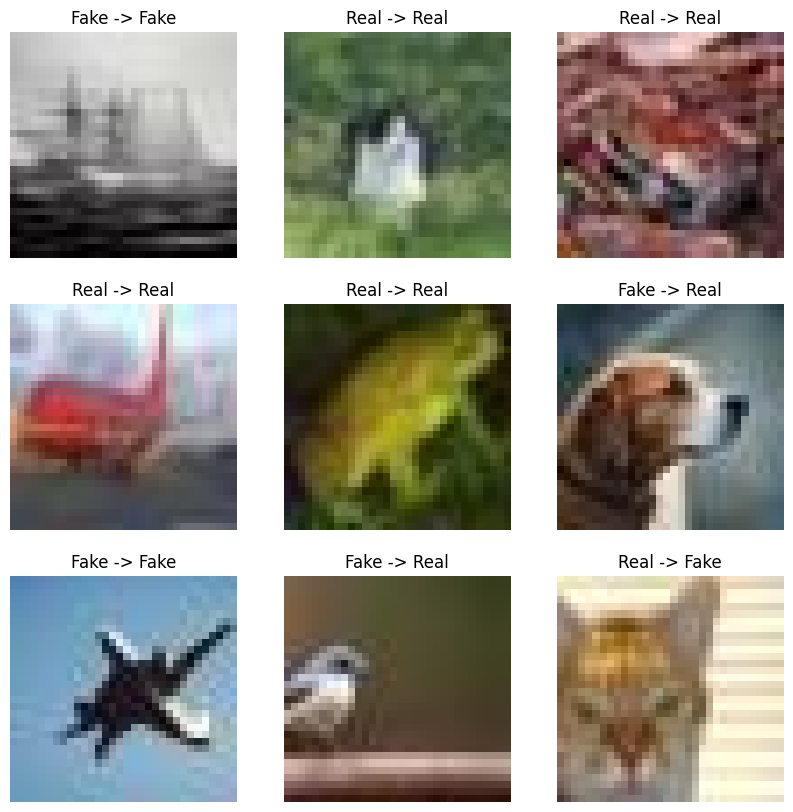

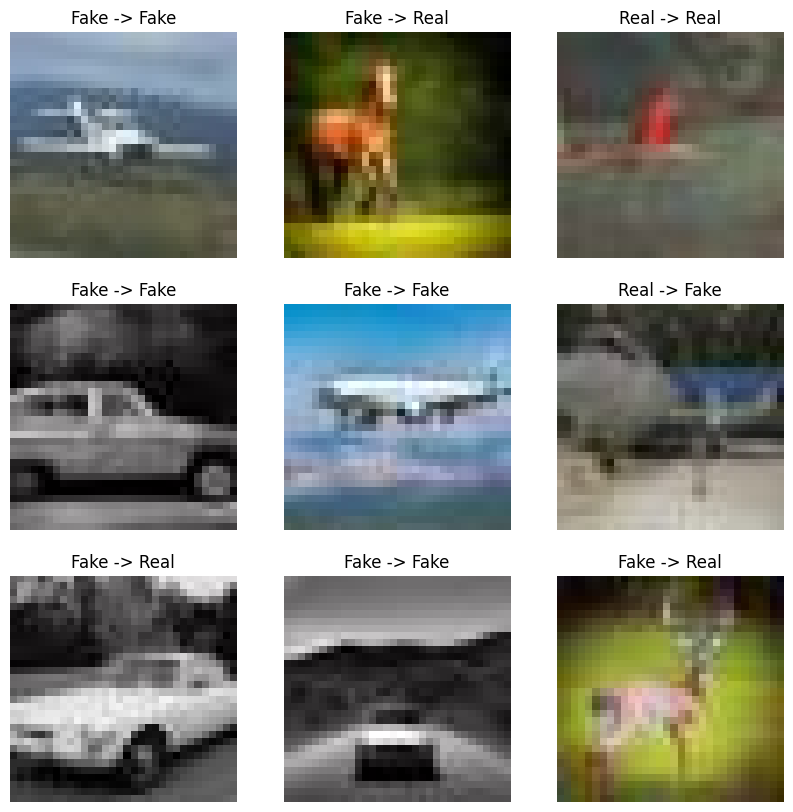

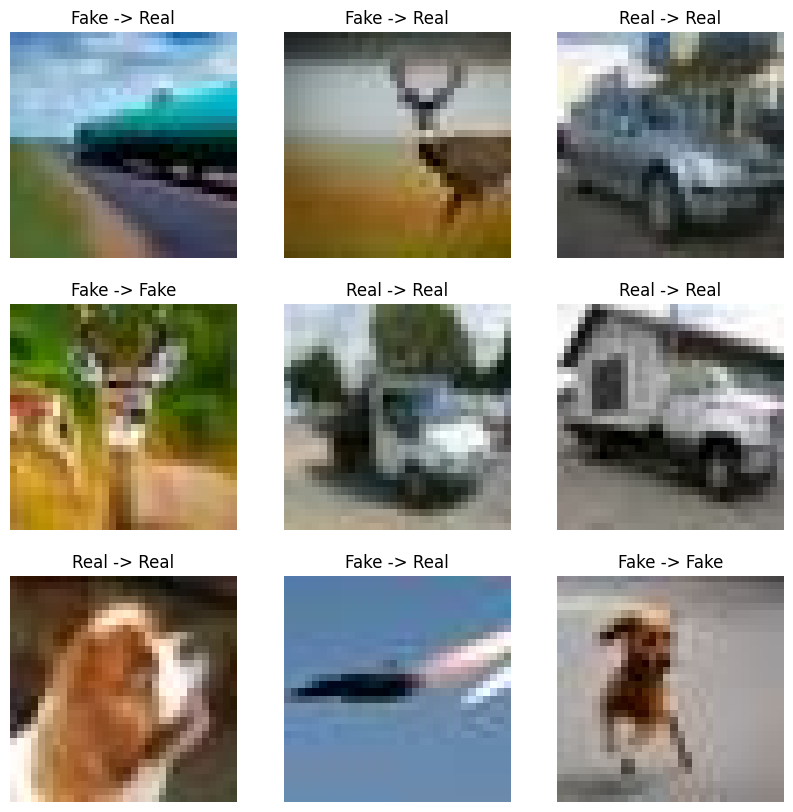

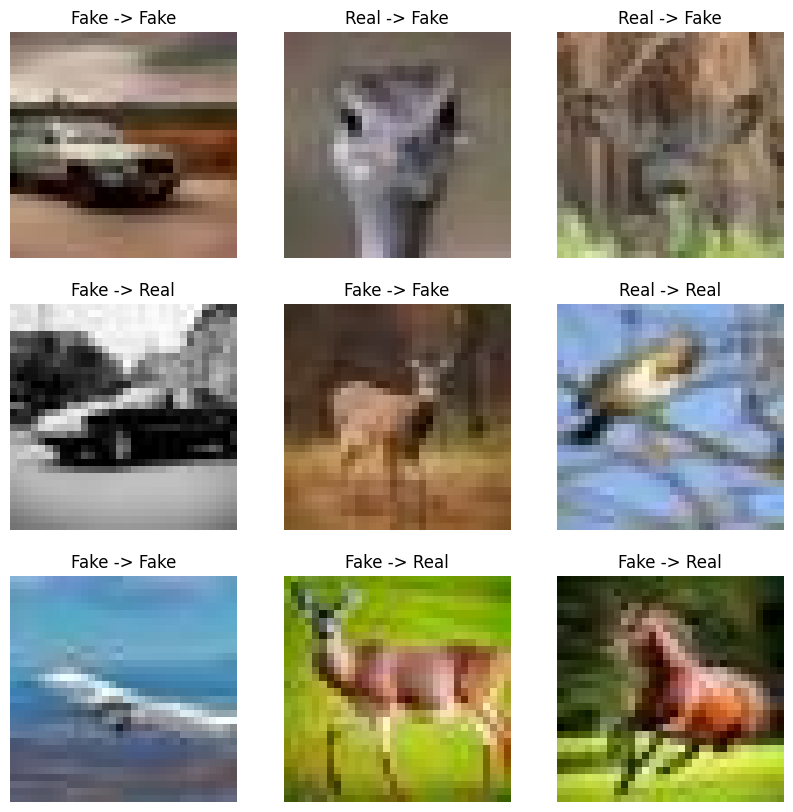

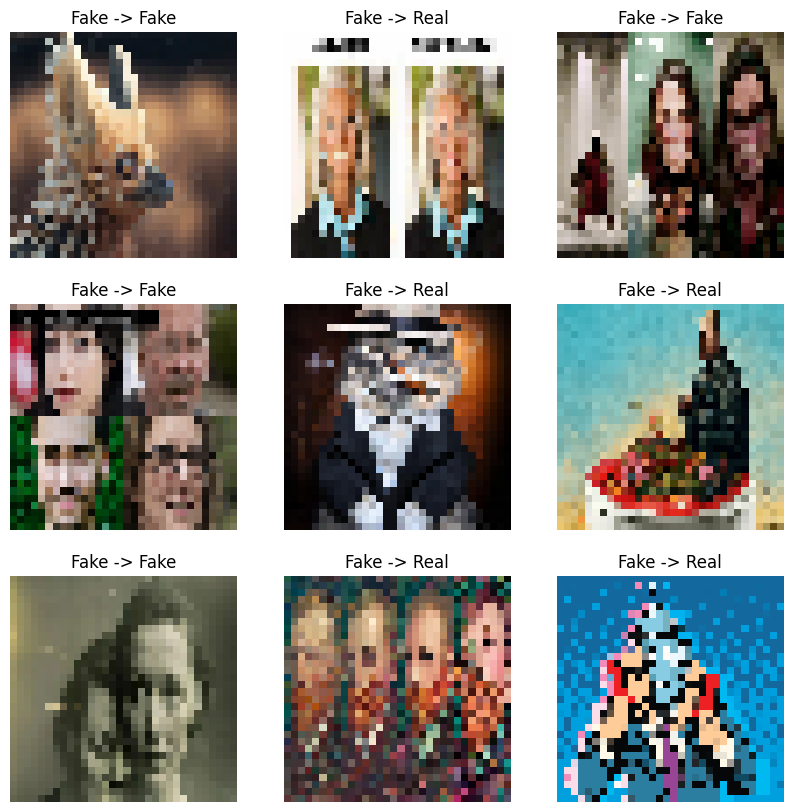

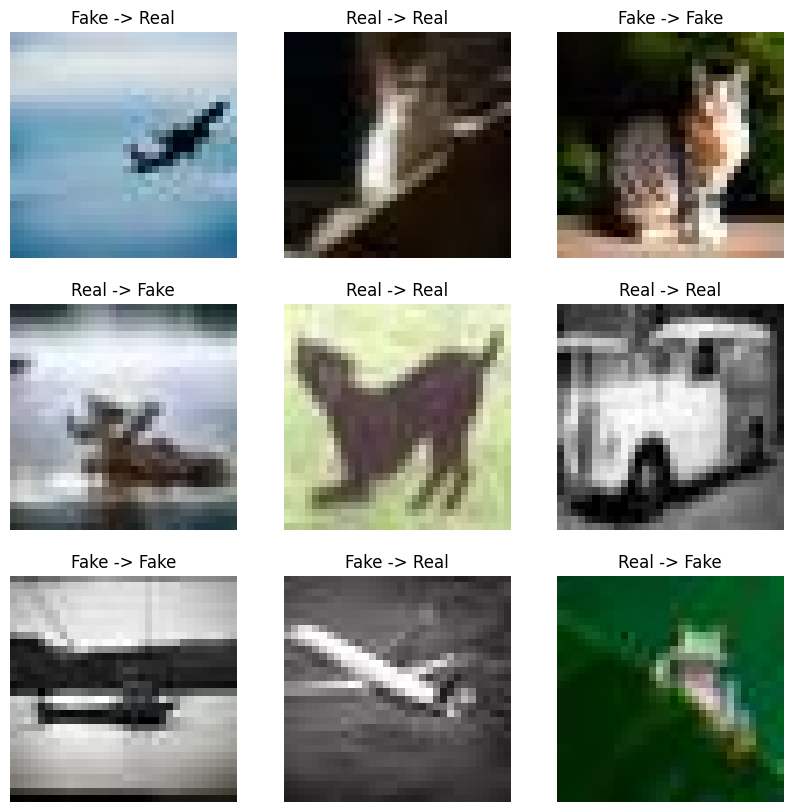

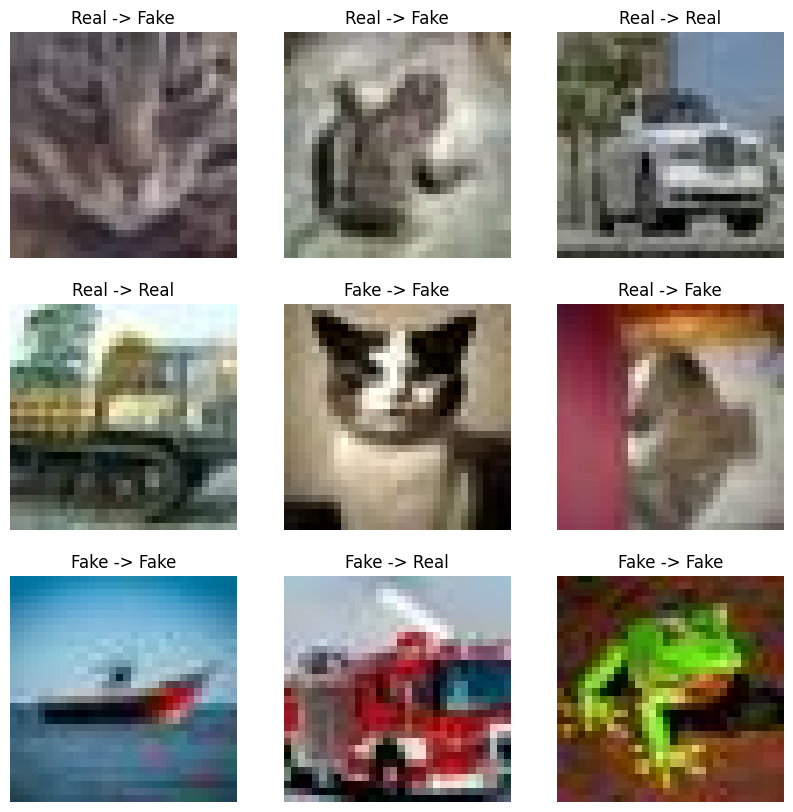

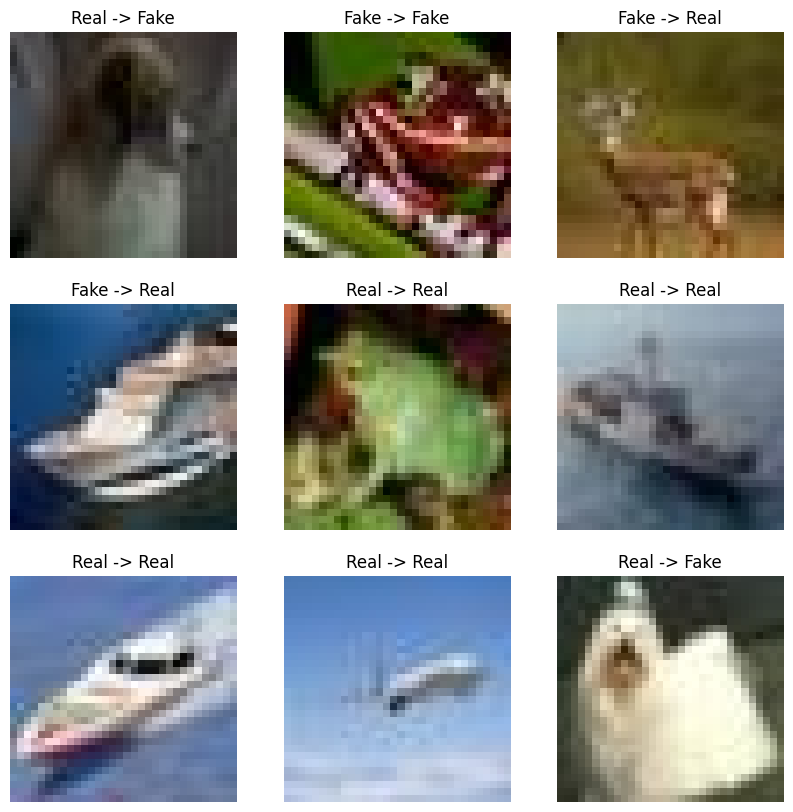

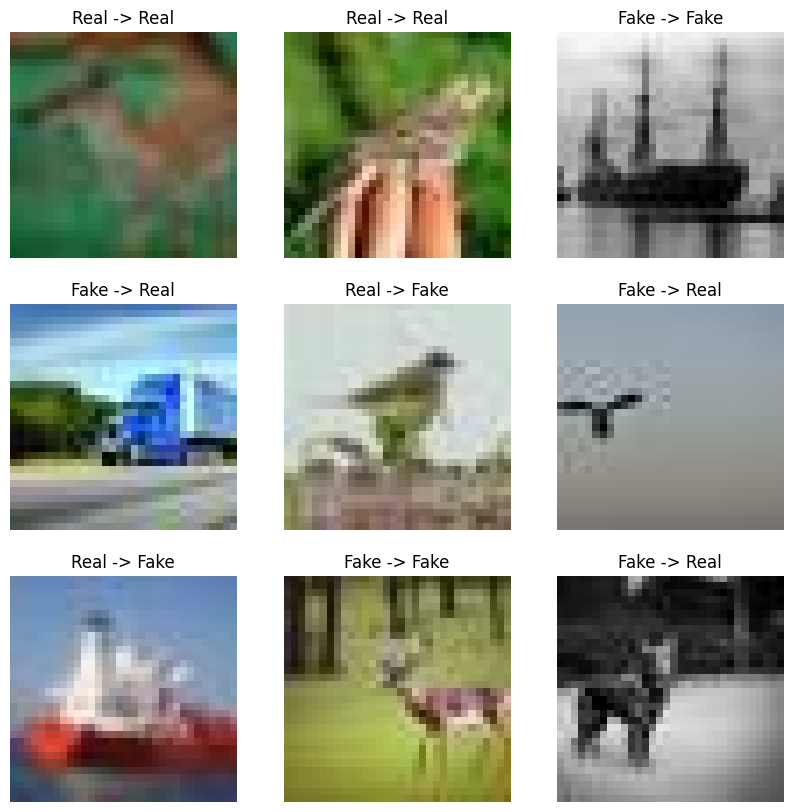

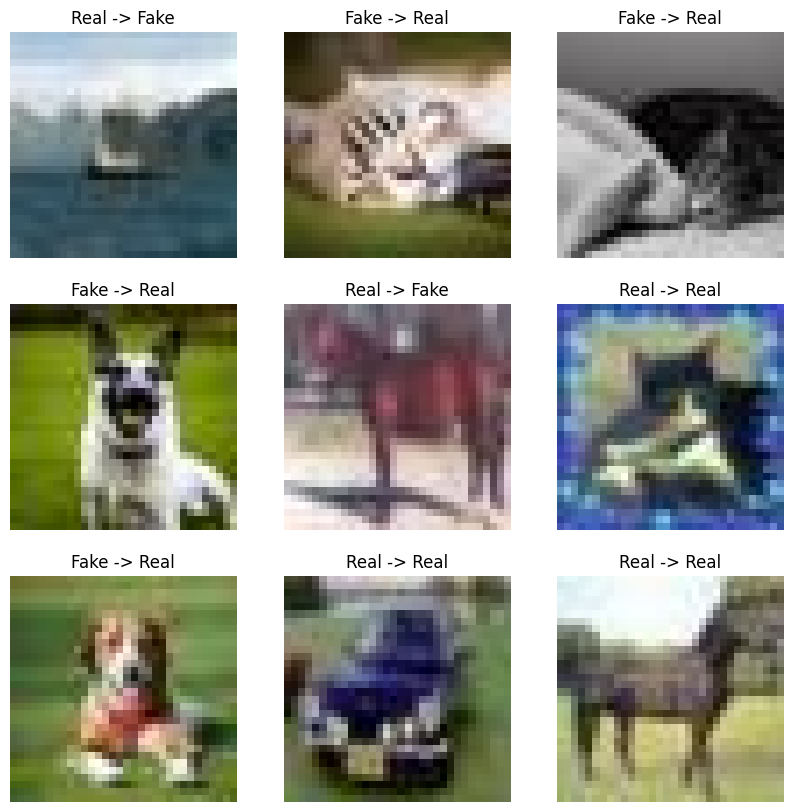

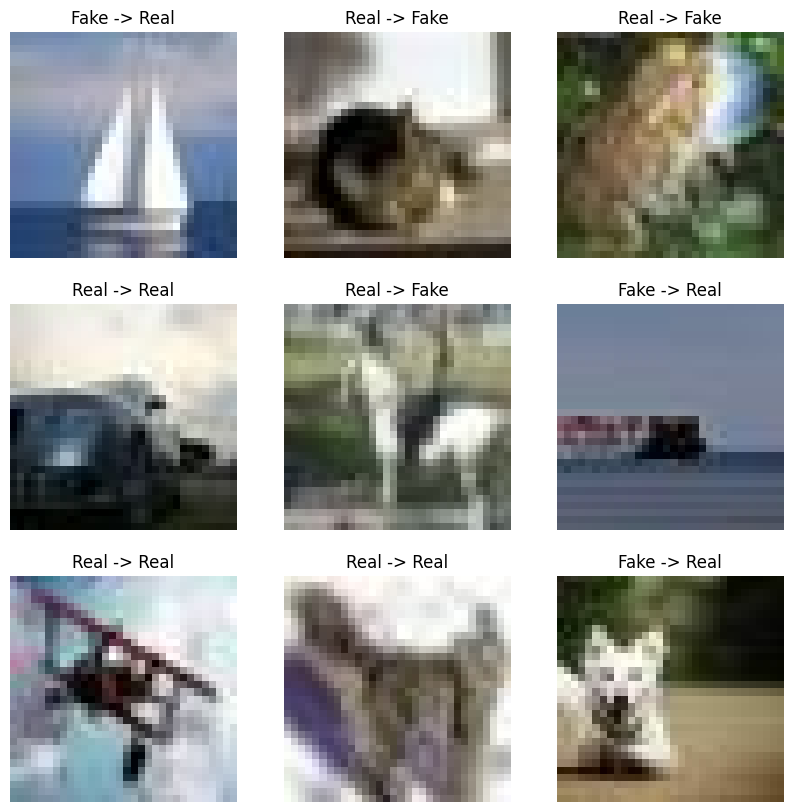

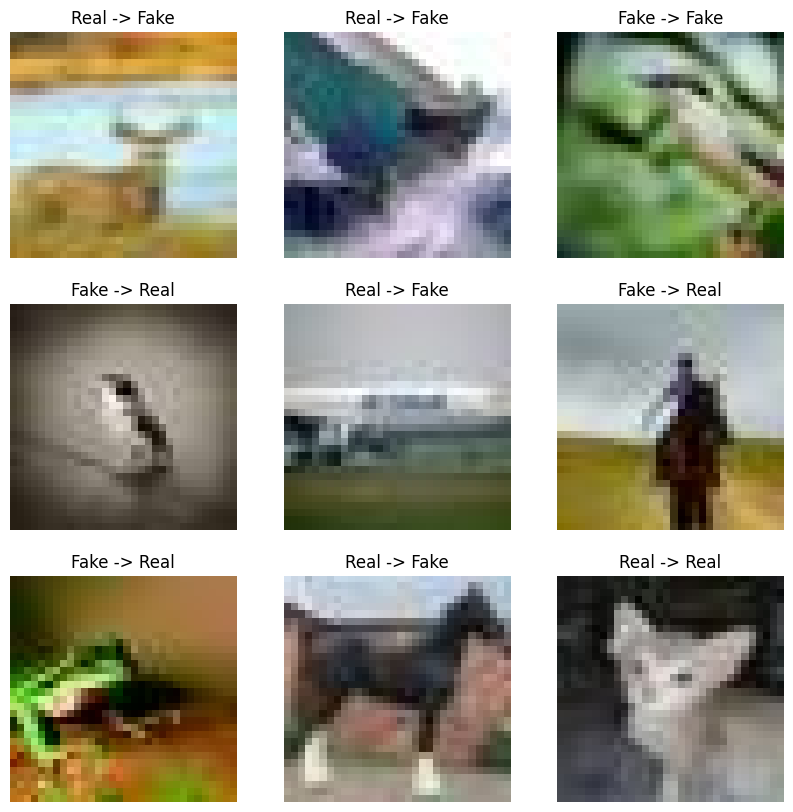

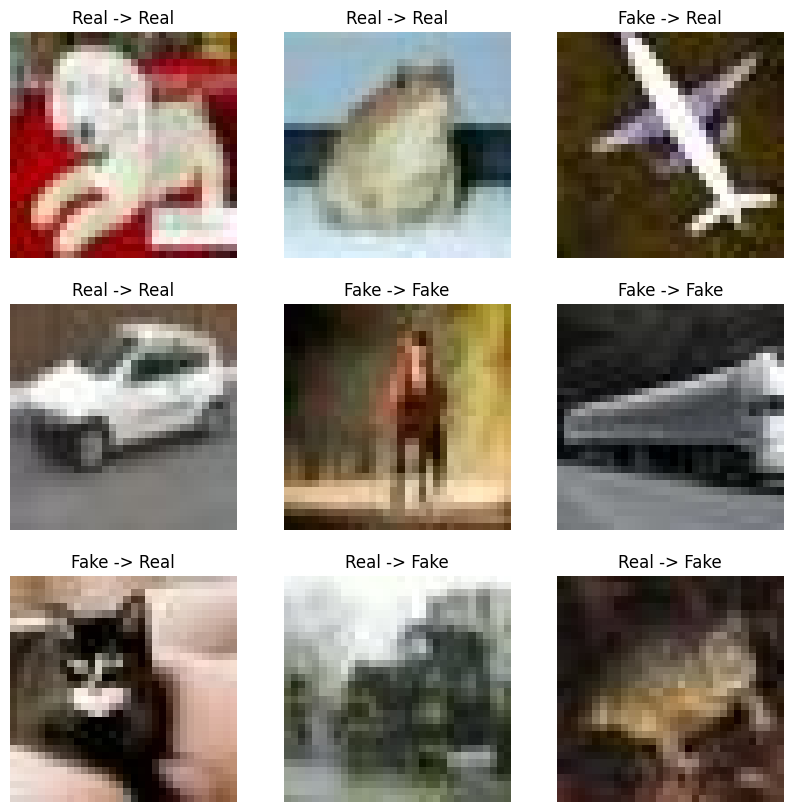

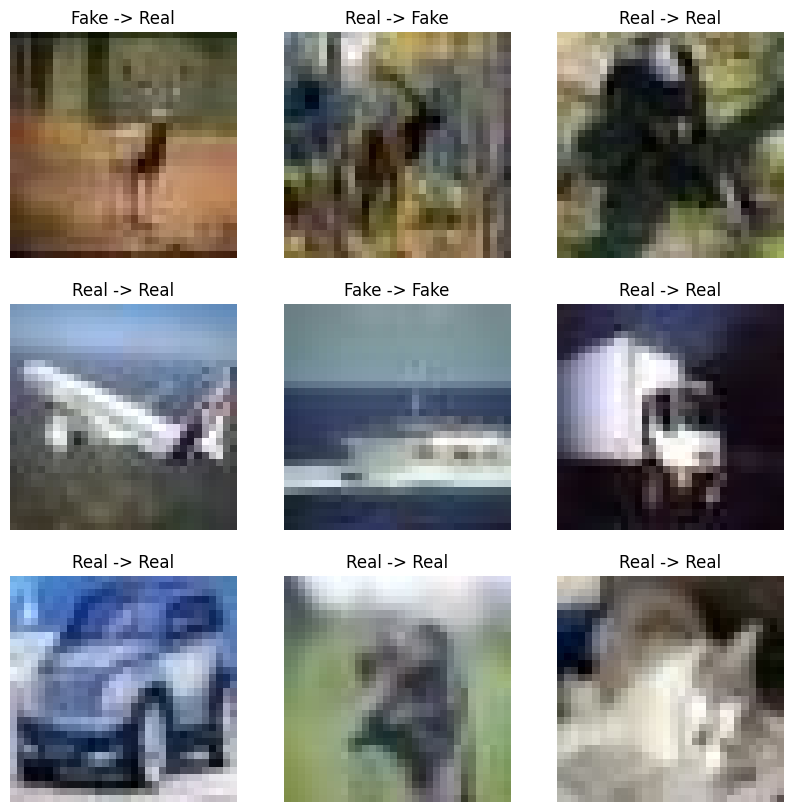

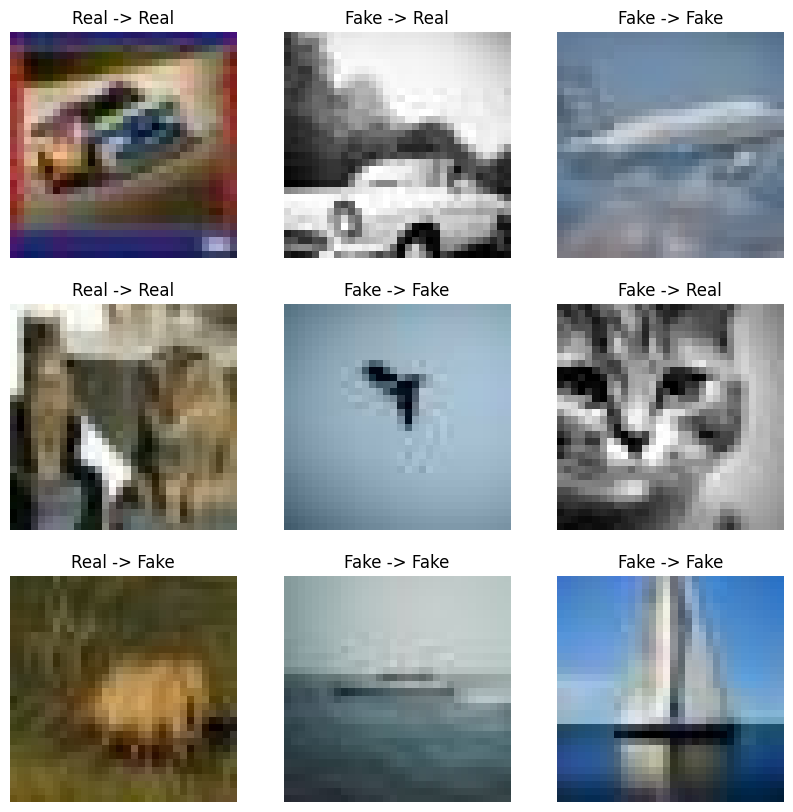

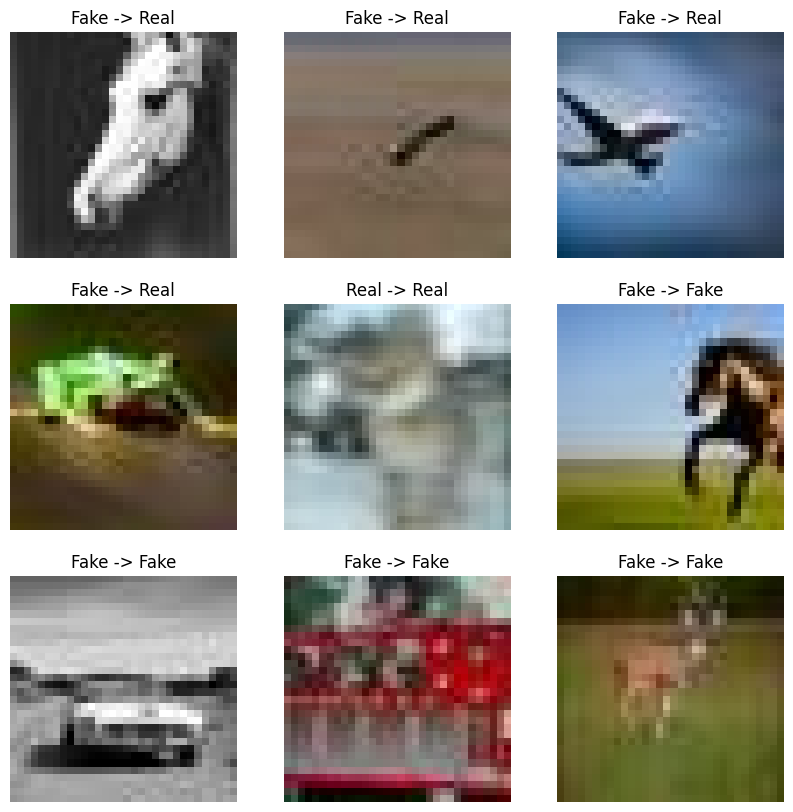

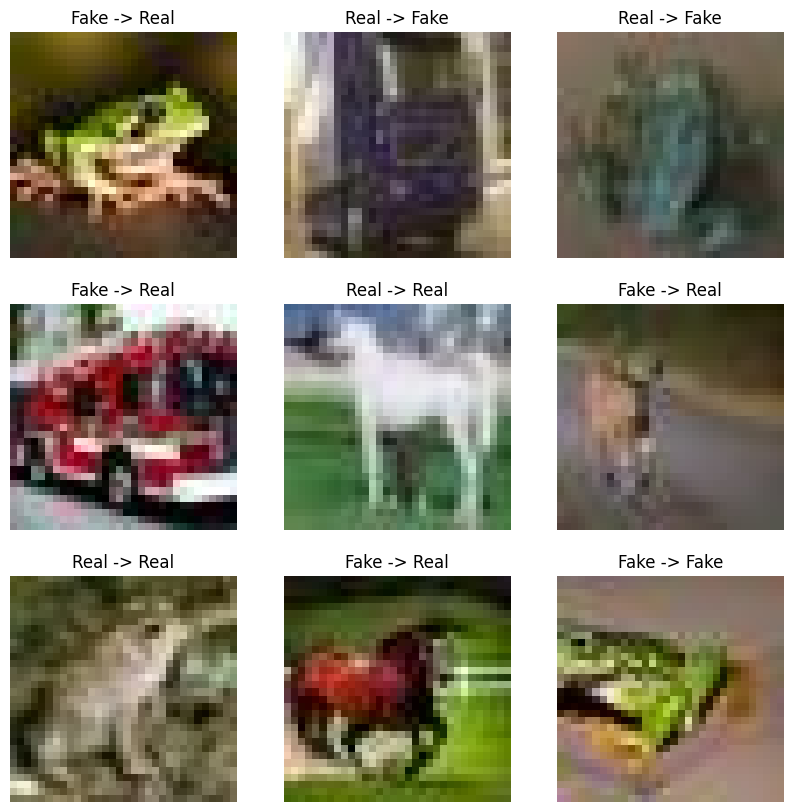

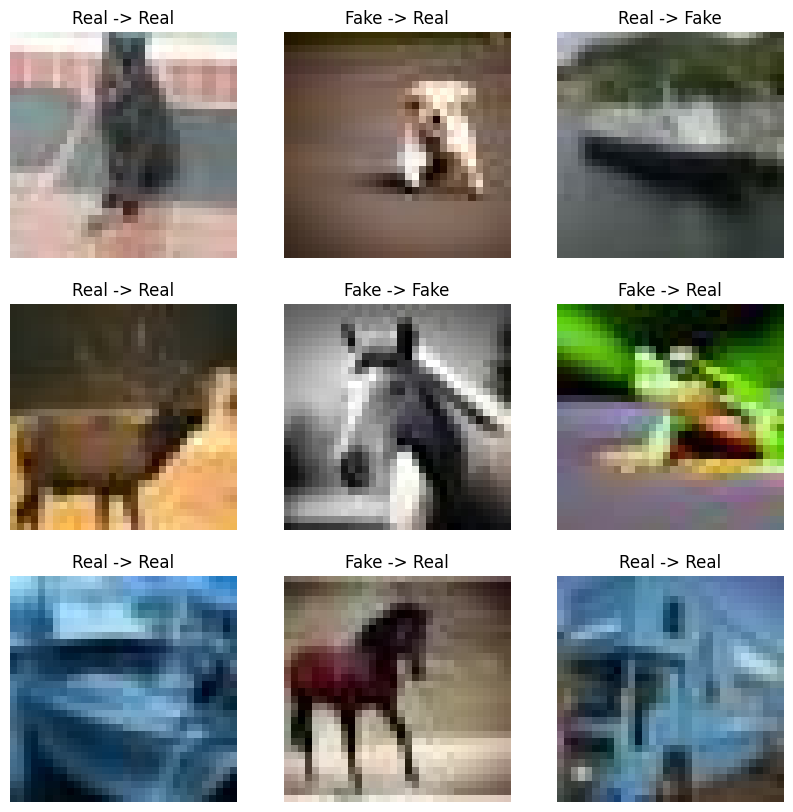

33/33 [==============================] - 8s 22ms/step - loss: 0.4040 - accuracy: 0.9157 - precision_18: 0.9956 - recall_18: 0.8351
test Loss: 0.4040
test Accuracy: 0.9157
test Precision: 0.9956
test Recall: 0.8351


In [ ]:
result_show(VGG_model,validation_dataset)

**EfficientNet모델**

In [ ]:
# Building the Transfer Learning model using EfficientNetV2B0
EfficientNet_base_model = tf.keras.applications.EfficientNetV2B0(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
EfficientNet_base_model.trainable = True

# Create a new model on top of the EfficientNet base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = EfficientNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
EfficientNet_model = tf.keras.Model(inputs, outputs)

# Compile the Transfer Learning model
EfficientNet_model.compile(
    optimizer = tf.keras.optimizers.Adamax(learning_rate = .001),
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
EfficientNet_model.summary()

In [ ]:
# Visualize the EfficientNet model architecture
tf.keras.utils.plot_model(EfficientNet_model, show_shapes = True, to_file = 'EfficientNet_model.png')
Image('EfficientNet_model.png')

In [ ]:
# Finally, train the Transfer Learning model
print("Starting training with Transfer Learning using EfficientNet...")
EfficientNet_model_history = EfficientNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = EfficientNet_model.evaluate(test_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = EfficientNet_model.evaluate(test_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

**MobileNet 모델로 Transfer Learning**

In [ ]:
# Building the Transfer Learning model using MobileNetV3
MobileNet_base_model = tf.keras.applications.MobileNetV3Small(
    include_top = False,
    weights = 'imagenet',
    input_shape = (img_height, img_width, 3),
    pooling = 'max'
)
MobileNet_base_model.trainable = True

In [ ]:
# Create a new model on top of the MobileNet base
inputs = tf.keras.Input(shape = (img_height, img_width, 3))
x = MobileNet_base_model(inputs, training = False)
x = BatchNormalization(axis = -1, momentum = 0.99, epsilon = 0.001)(x)
x = Dense(256,
          kernel_regularizer = regularizers.l2(0.01),
          activity_regularizer = regularizers.l1(0.01),
          bias_regularizer = regularizers.l1(0.01),
          activation = 'relu')(x)
x = Dropout(rate = .4, seed = 512)(x)
x = Dense(64, activation = 'relu')(x)
outputs = Dense(1, activation = 'sigmoid')(x)
MobileNet_model = tf.keras.Model(inputs, outputs)

In [ ]:
# Compile the Transfer Learning model
MobileNet_model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.BinaryCrossentropy(),
    metrics = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Build the Transfer Learning model so we can see a summary
MobileNet_model.summary()

In [ ]:
# Visualize the MobileNet model architecture
tf.keras.utils.plot_model(MobileNet_model, show_shapes = True, to_file = 'MobileNet_model.png')
Image('MobileNet_model.png')

In [ ]:
# Finally, train the Transfer Learning model
print("Starting training with Transfer Learning using MobileNet...")
MobileNet_model_history = MobileNet_model.fit(
    train_dataset,
    validation_data = validation_dataset,
    epochs = 5,
    verbose = 1,
    callbacks = [early_stopping]
)
print("Transfer Learning training finished.")

In [ ]:

val_loss, val_accuracy, val_precision, val_recall = MobileNet_model.evaluate(validation_dataset)

# Print the metrics
print(f"Val Loss: {val_loss:.4f}")
print(f"Val Accuracy: {val_accuracy:.4f}")
print(f"Val Precision: {val_precision:.4f}")
print(f"Val Recall: {val_recall:.4f}")

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy, test_precision, test_recall = MobileNet_model.evaluate(test_dataset)

# Print the metrics
print(f"test Loss: {test_loss:.4f}")
print(f"test Accuracy: {test_accuracy:.4f}")
print(f"test Precision: {test_precision:.4f}")
print(f"test Recall: {test_recall:.4f}")